## Imports

In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# from linear_model: LinearRegression (OLS), LassoLars, TweedieRegressor (Generalized Linear Model)
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle

## What is driving the errors in the Zestimates?

## Initial Questions
 - Does the county a property is located in affect it's log error?
 - Does the tax_value of a house affect the logerror?
 - Does the ratio of home sqft to lot sqft affect logerror?
 - Does the year a house was built affect logerror?

## Data Acquisition and Preparation

We acquired data from the 2017 properties and predictions data for single unit / single family homes. The data is acessed from data.codeup.com using a SQL query. Approximately 52,000 observations are retrieved.

Missing Values: On our initial analysis of the data shows a large amount of missing values. We kept the preparation simple by removing outliers, filling nulls for multiple columns and dropping those that were insignificant. However, in order to prevent a large loss of data we took the following steps:

Remove any columns that are missing by #############what %
Remove any rows with a missing value by ############## what %
Scaling
This results in a train data of approximately 43,000 observations, reduced features which was deemed acceptable since we still had some data to work on.



In [2]:
# As per our wrangle py,
# We will acquire, prepare, and split data and store the results in our train, validate, and test dataframes. 
train, validate, test = wrangle.wrangle_zillow()

Here we will scale our data into 3 data splits using MinMax Scaler except for the target variable logerror. Takes in train, validate, and test data splits as well as a list of the features to scale. Returns dataframe with scaled counterparts on as columns

In [3]:
# Here data is scaled using a MinMaxScaler.
train_scaled, validate_scaled, test_scaled = wrangle.wrangle_zillow()

In [4]:
#split scaled features into train, validate & test
X_train_scaled = train_scaled
y_train = train[['logerror']]

X_validate_scaled = validate_scaled
y_validate = validate[['logerror']]

X_test_scaled = test_scaled
y_test = test[['logerror']]

In [5]:
#check log error
y_train.head(1)

,logerror
15552,0.01


## Exploratory Analysis
After data preparation and splitting we can now begin exploring the data to identify key features that will be most useful for predicting logerror.

The visualizations below aims at answering our initial questions about the data.

## 1. What is the realtionship between bedrooms, bathrooms and logerror?

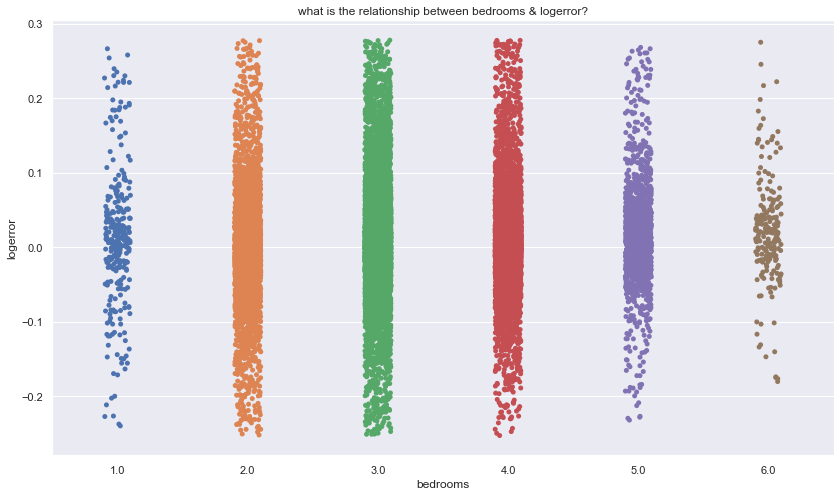

In [6]:
plt.figure(figsize=(14,8))
sns.stripplot(x = 'bedrooms', y = 'logerror', data = train)
plt.title('what is the relationship between bedrooms & logerror?')
plt.show()

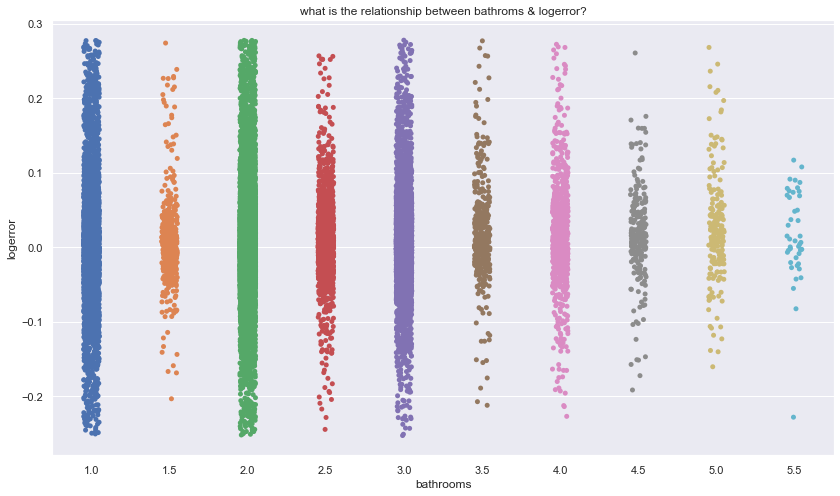

In [7]:
plt.figure(figsize=(14,8))
sns.stripplot(x = 'bathrooms', y = 'logerror', data = train)
plt.title('what is the relationship between bathroms & logerror?')
plt.show()

## 2. How does county relate to log error?¶

<Figure size 1008x576 with 0 Axes>

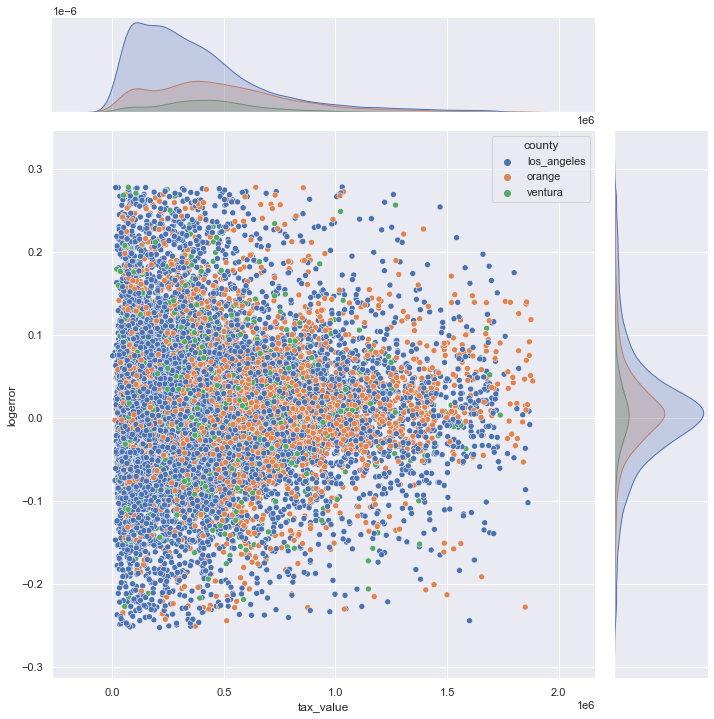

In [8]:
plt.figure(figsize=(14,8))
sns.jointplot(x='tax_value',y='logerror', data=train, hue='county',hue_order=['los_angeles','orange','ventura'],height=10)
plt.show()

## Takeaways
From visualization it seems that there does not seem to be a relationship between tax_value and logerror.
Let's see if statistical can help that statement.

Tax_value testing

(H_0): There IS NOT a relationship between tax_value and logerror. 

(H_a): There IS a relationship between tax_value and logerror



## 3. How does tax_value relate to log error?

<Figure size 864x576 with 0 Axes>

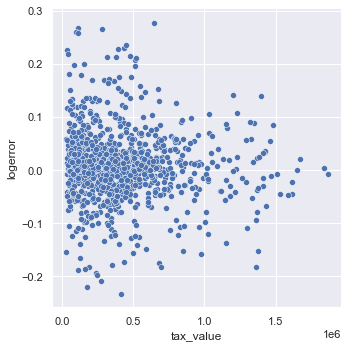

In [9]:
plt.figure(figsize=(12,8))
sns.relplot(x=train['tax_value'].sample(1000),y='logerror', data=train, kind='scatter')

## Takeaways
From visualization it seems that there does not seem to be a relationship between tax_value and logerror. Let's see if statistical can help that statement.

Tax_value testing

(H_0): There IS NOT a relationship between tax_value and logerror.

(H_a): There IS a relationship between tax_value and logerror

## 4. How does the year a home was built affect the logerror?

<Figure size 864x576 with 0 Axes>

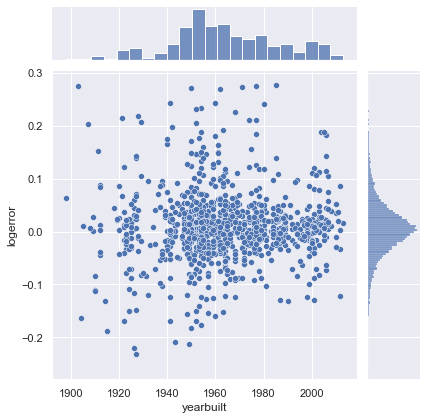

In [10]:
plt.figure(figsize=(12,8))
sns.jointplot(x=train['yearbuilt'].sample(1000), y='logerror', data=train)
plt.show()

## Takeaways
Again here the lcusters are not very useful. Lets see if this is true through statistical testing Homes before 2010 vs homes after 2010 logerror difference.

(H_0): Homes built before 2010 DO NOT have a logerror cloeser to 0.

(H_a): Homes built before 2010 DO have a logerror cloeser to 0.

## Summary of Exploration
Here we identified features county, tax_value, square feet and year built as being potential key drivers of logerror. Additionally we created clusters using the features ######, #####, and ####, and showed that these clusters did not help in any way as drivers of logerror. Of all the features only tax_value showed a relationship towards logerror.

The visualizations produced and statistical testing results confirm that there is significant differences in mean logerror between various groups in each of these features. Whatever the case we will take these features into modeling and see if they assist in improving logerror prediction.

## Modeling
We can now begin to build machine learning models try creating some models with and without cluster features and see if it makes a difference. We will look at the performance of each model and evaluate using the root mean squared error which will give us the average distance between the predicted values and the actual values. With this evaluation metric we will know how far off the predictions are on average.

Lets establish a baseline model with which to compare our models.

In [ ]:
# Here we establish a baseline model which will either the mean or median of the target, whichever 
# provides the lower RMSE score.
baseline = establish_baseline(train['logerror'])

Now with the baseline model established we can create our models.

We can see Polynomial model with the cluster feature has the best performance overall and only slightly better than the baseline. 

Now we can make predictions on test.

In [ ]:
# Now let's make predictions on test using the linear regression model with the cluster feature.
evaluate_on_test(models[5], test_scaled, 'logerror')

The performance on test is consistent with with train and validate.

## Modeling takeaways
The Polynomial Features Degrees = 3 model peformed the best out of all 4 models tested for both train and validate datasets.

However did not outperform baseline on the test dataset. Further research will need to be done to improve these models.

## Conclusions and Next Steps
We believe that this dataset is simply too large and perhaps focusing in on smaller areas may provide some benefits.

With the housing market being so volatile and prone to being affected by outside forces it can be hard to predict both pricing and improve logerror.

With that said our final onclusion is that the features elected for our model are not ones to be utilized and further research will need to be done to improve the logerror.